In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [12]:
# Завантаження Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Пошук оптимального K для KNN класифікації
best_k = None
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_k = k

print(f'The best k for Iris dataset = {best_k}, score = {best_score}')


The best k for Iris dataset = 1, score = 1.0


In [13]:
# Створення синтетичного датасету
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2  # Бінарна класифікація

# Поділ на тренувальну і тестову вибірки
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

# Пошук оптимального K для KNN класифікації на синтетичних даних
best_k_syn = None
best_score_syn = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_syn, y_train_syn)
    score = knn.score(X_test_syn, y_test_syn)
    if score > best_score_syn:
        best_score_syn = score
        best_k_syn = k

print(f'The best k for synthetic dataset = {best_k_syn}, score = {best_score_syn}')


The best k for synthetic dataset = 2, score = 0.9


In [14]:
# Візуалізація кордонів класифікації
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['green', 'blue'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.show()

# Тренування моделі з найкращим K
knn_best = KNeighborsClassifier(n_neighbors=best_k_syn)
knn_best.fit(X_train_syn, y_train_syn)


KNeighborsClassifier(n_neighbors=2)

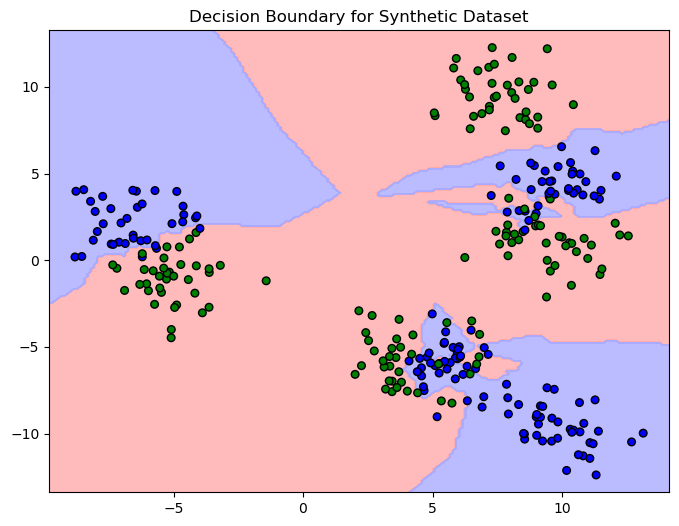

In [15]:
# Візуалізація
plot_decision_boundary(X_D2, y_D2, knn_best, 'Decision Boundary for Synthetic Dataset')